# Understanding Backpropagation - MLP
## Created by Sanasam Ranbir Singh

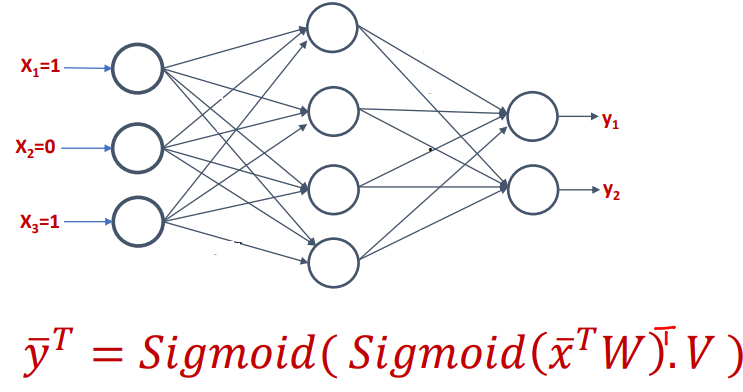


In [141]:
import numpy as np 

In [142]:
# ---- Assumptions -----------------
# 
# There is only one hidden layer
# x: input vector [3 nodes]
# y: output vector [2 nodes]
# Hidden layer: 4
# W: weight matrix between input layer and hidden layer
# V: weight matrix between hidden layer and out layer
#
# Description: Given a sample vector x, demonstrate forward pass i.e., sequence of computation at different stages.
#
# -----------------------------------


x = np.array([1,2,1])     # let us say x is the input sample
print("Input Sample vector: x")
print(x)

# let us define the weights W and V. I have randomely initialized
np.random.seed(1)
W = np.random.random((3,4))
V = np.random.random((4,2))
print("Weight Matrix W: ")
print(W)
print("Weight Matrix V: ")
print(V)


# ------- Forward Pass -------------------
# The output vector be defined as follows
# y = sigmoid(sigmoid(x.W).V)
# ----------------------------------------

# Output of the hidden layer
hPer = np.dot(x,W)         # Perceptron : x.W
hOut = 1/(1+np.exp(-hPer)) # Sigmoid : sigmoid(x.W)
print("Output Vector of the hidden layer :")
print(hOut)

# Output of the output layer
oPer = np.dot(hOut,V)         # Perceptron: sigmoid(x.W).V
oOut = 1/(1+np.exp(-oPer)) # Sigmoid : y = sigmoid(sigmoid(x.W).V)
print("Output Vector of the output layer :")
print(oOut)


Input Sample vector: x
[1 2 1]
Weight Matrix W: 
[[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01]]
Weight Matrix V: 
[[0.20445225 0.87811744]
 [0.02738759 0.67046751]
 [0.4173048  0.55868983]
 [0.14038694 0.19810149]]
Output Vector of the hidden layer :
[0.75162564 0.80904526 0.68822398 0.8427288 ]
Output Vector of the output layer :
[0.64137491 0.8524445 ]


# Backpropagation
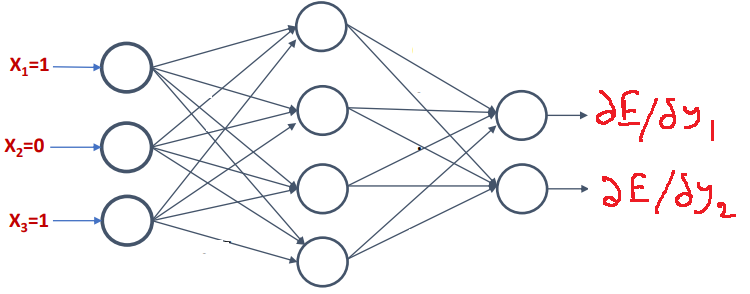

<br><br>
## Partial derivative of loss function with respect to y

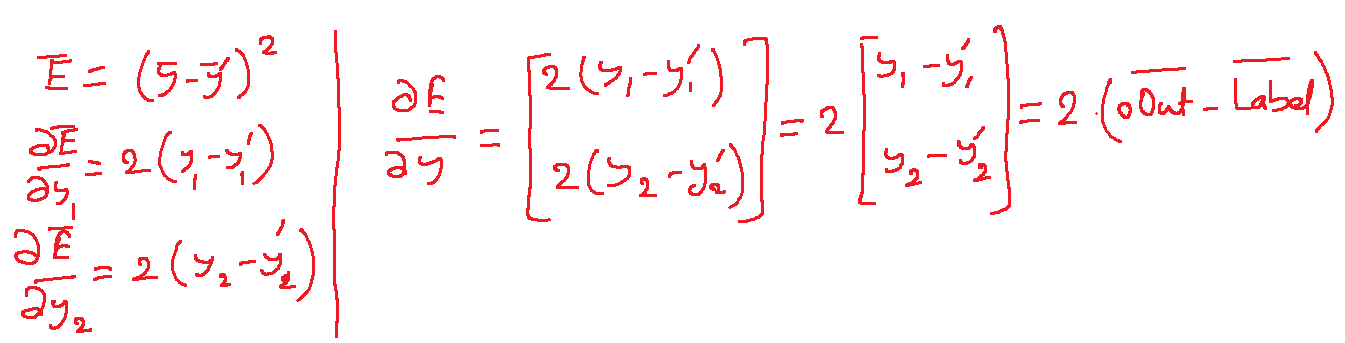

In [143]:
#------ BACKPROPAGATION ----------------------

# Let us say, the grund truth vector for the sample x is [1,0]
label = np.array([1, 0])

gMSE = 2*np.subtract(oOut,label)  # Gradian of Mean Square Error  i.e. dE/dy= 2/n Sum(y-y')

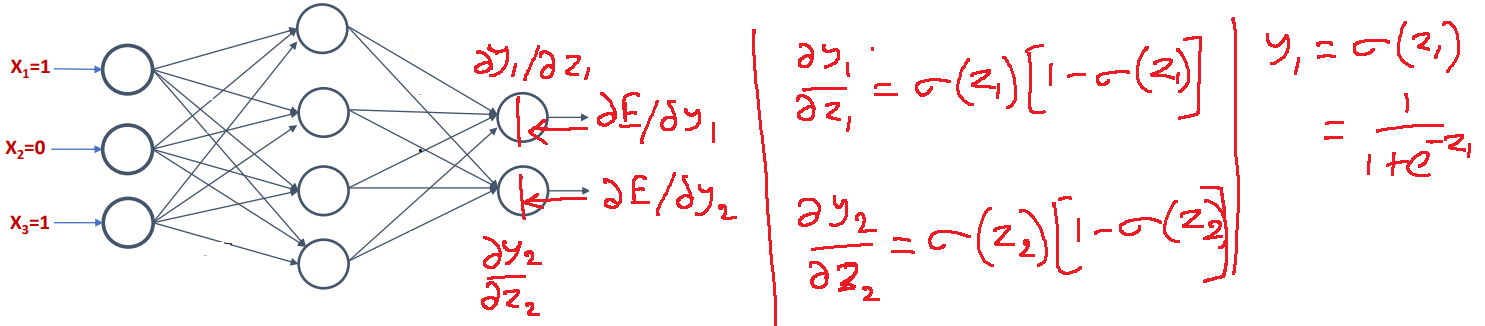

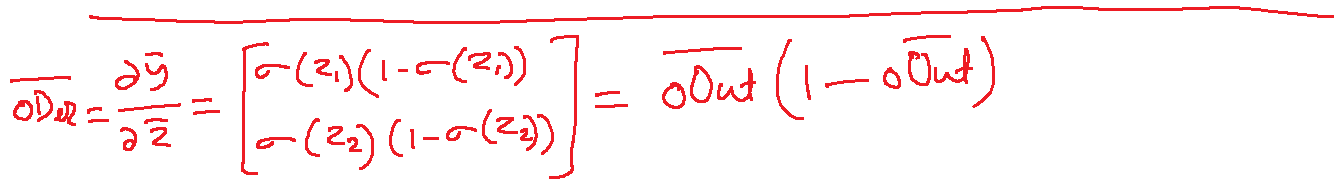

In [144]:
oDer = oOut * (1-oOut) # dirivatives of sigmoid in the output layer with respect to perceptron output i.e, dy/dz
                        # dy/dz = sig(z)(1-sig(z))

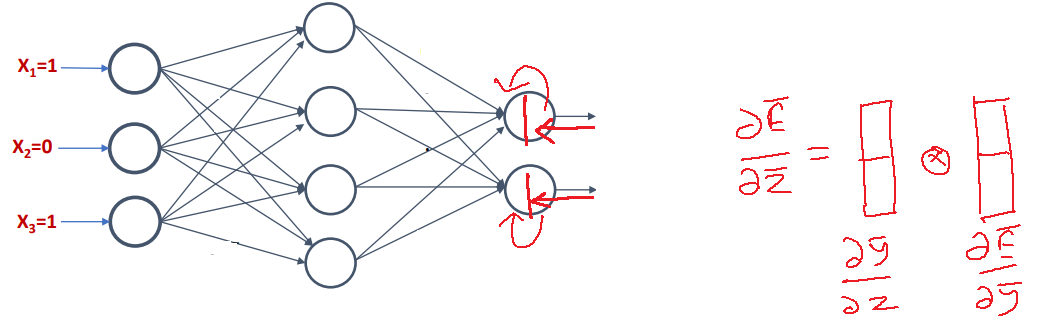

In [149]:
# dE/dz = dy/dz.dE/dy
tp = oDer*MSE
tp = tp.reshape(-1,2)

# Estimating V
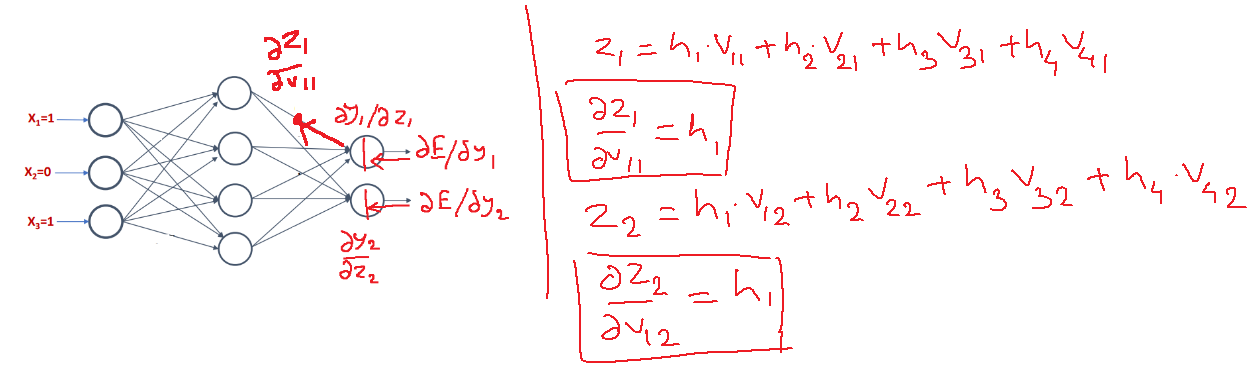


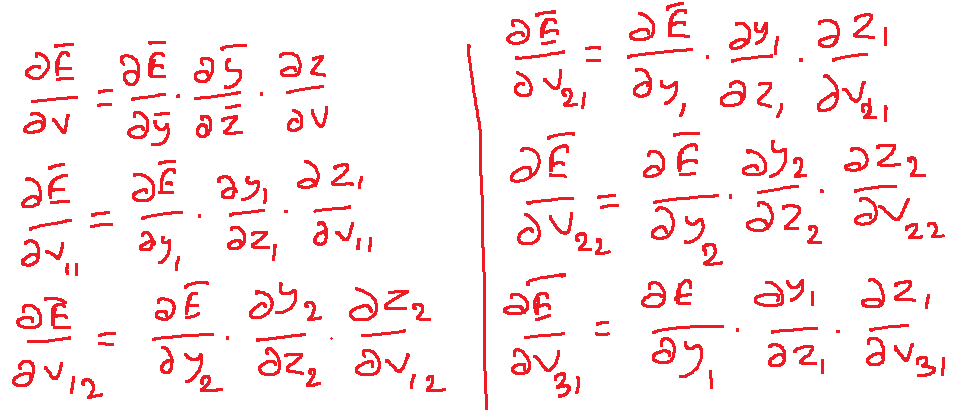

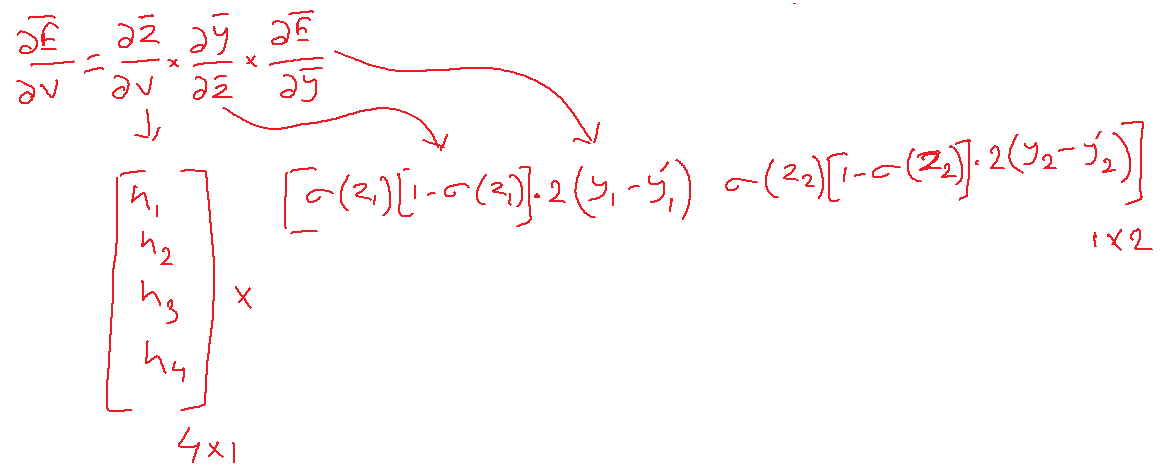

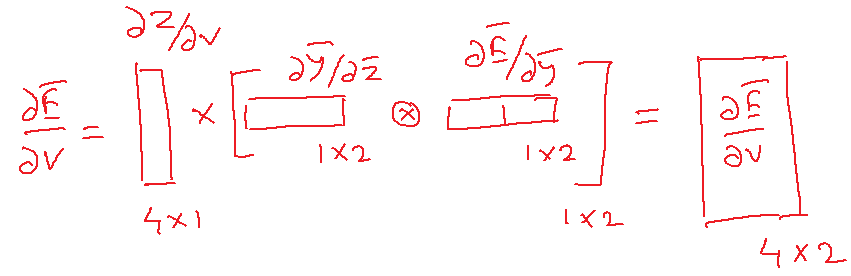


In [150]:
# dE/dV=dz/dV .dy/dz dE/dy. it is a matrix of 4x2  (i.e., four nodes in hidden layer and two nodes in output layer)
hOut = hOut.reshape(4,-1)
vGrad = np.matmul(hOut, tp)        # dE/dV=dz/dV .dy/dz dE/dy.
print (vGrad)



[[-0.11726854  0.16179498]
 [-0.12602419  0.1738751 ]
 [-0.10716226  0.14785138]
 [-0.13101237  0.18075728]]


# Estimating W


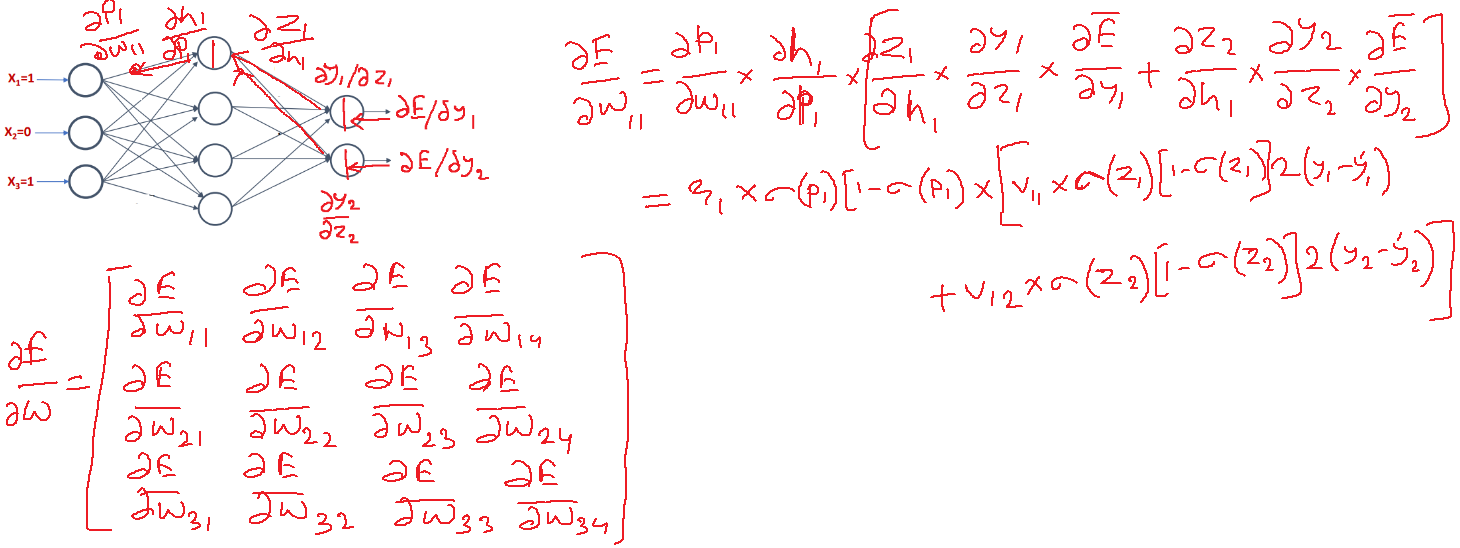



In [146]:
tmp=oDer*gMSE       #dE/dy.dy/dz
V=V.reshape(4,-1)
tmp=tmp.reshape(2,-1)
tmp=np.matmul(V,tmp) #V.dE/dy.dy/dz

hDer = hOut * (1-hOut) # dh/dp  gradiant of the sigmoid at the hidden layer
hDer = hDer*tmp        # dh/dp.dz/dh.dy/dz.dE/dy

hDer=hDer.reshape(-1,4)
x=x.reshape(3,-1)      # input sample 
wGrad= np.matmul(x, hDer) # dE/dW = dp1/dw.dh/dp.dz/dh.dy/dz.dE/dy


[[0.20329435 0.87979086]
 [0.02614124 0.67226878]
 [0.41624458 0.5602221 ]
 [0.13908869 0.19997775]]
[[4.17310579e-01 7.20539639e-01 2.23727077e-04 3.02358181e-01]
 [1.47333040e-01 9.27688852e-02 1.86478916e-01 3.45611943e-01]
 [3.97056049e-01 5.39031879e-01 4.19303867e-01 6.85245108e-01]]


# Update the Parameters V and W
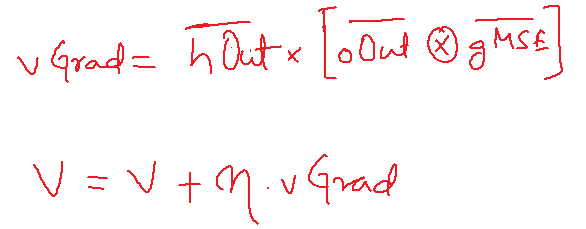

In [ ]:
# ----Update the gradients --------- 
V += 0.01*vGrad                    # V = V + r.vGrad
print(V)

W += 0.01*wGrad
print(W)

# Next Forward pass iteration

In [147]:
# ------- Forward Pass -------------------
# The output vector be defined as follows
# y = sigmoid(sigmoid(x.W).V)
# ----------------------------------------
x=x.reshape(-1,3)      # input sample 
# Output of the hidden layer
hPer = np.dot(x,W)         # Perceptron : x.W
hOut = 1/(1+np.exp(-hPer)) # Sigmoid : sigmoid(x.W)
print("Output Vector of the hidden layer :")
print(hOut)

# Output of the output layer
oPer = np.dot(hOut,V)         # Perceptron: sigmoid(x.W).V
oOut = 1/(1+np.exp(-oPer)) # Sigmoid : y = sigmoid(sigmoid(x.W).V)
print("Output Vector of the output layer :")
print(oOut)

Output Vector of the hidden layer :
[[0.75194873 0.80924461 0.68836475 0.84274917]]
Output Vector of the output layer :
[[0.64055333 0.85317907]]


# Put them together

In [151]:
import numpy as np 
# ---- Assumptions -----------------
# 
# There is only one hidden layer
# x: input vector [3 nodes]
# y: output vector [2 nodes]
# Hidden layer: 4
# W: weight matrix between input layer and hidden layer
# V: weight matrix between hidden layer and out layer
#
# Description: Given a sample vector x, demonstrate forward pass i.e., sequence of computation at different stages.
#
# -----------------------------------


x = np.array([1,2,1])     # let us say x is the input sample
print("Input Sample vector: x")
print(x)

# let us define the weights W and V. I have randomely initialized
np.random.seed(1)
W = np.random.random((3,4))
V = np.random.random((4,2))
print("Weight Matrix W: ")
print(W)
print("Weight Matrix V: ")
print(V)

#- Iterate to update the parameters
for iteration in range(10):
    # ------- Forward Pass -------------------
    # The output vector be defined as follows
    # y = sigmoid(sigmoid(x.W).V)
    # ----------------------------------------

    x=x.reshape(-1,3)      # input sample 
    # Output of the hidden layer
    hPer = np.dot(x,W)         # Perceptron : x.W
    hOut = 1/(1+np.exp(-hPer)) # Sigmoid : sigmoid(x.W)
    #print("Output Vector of the hidden layer :")
    #print(hOut)

    # Output of the output layer
    oPer = np.dot(hOut,V)         # Perceptron: sigmoid(x.W).V
    oOut = 1/(1+np.exp(-oPer)) # Sigmoid : y = sigmoid(sigmoid(x.W).V)
    #print("Output Vector of the output layer :")
    print(oOut)


    #------ BACKPROPAGATION ----------------------

    # Let us say, the grund truth vector for the sample x is [1,0]
    label = np.array([1, 0])


    # ---- Estimate gradient of V ------------------
    gMSE = 2*np.subtract(oOut,label)  # Gradian of Mean Square Error  i.e. dE/dy= 2/n Sum(y-y')
    oDer = oOut * (1-oOut) # dirivatives of sigmoid in the output layer with respect to perceptron output i.e, dy/dz
                        # dy/dz = sig(z)(1-sig(z))
    hOut = hOut.reshape(4,-1)
    tmp = oDer*MSE
    tmp = tp.reshape(-1,2)
    vGrad = np.matmul(hOut, tmp)        # dE/dV=dE/dy.dy/dz.dz/dV ; dz/dV = hOut    
    #print (vGrad)

    #-------Estimate Gradient of W
    tmp=oDer*gMSE       #dE/dy.dy/dz
    V=V.reshape(4,-1)
    tmp=tmp.reshape(2,-1)
    tmp=np.matmul(V,tmp) #V.dE/dy.dy/dz

    hDer = hOut * (1-hOut) # dh/dp  gradiant of the sigmoid at the hidden layer
    hDer = hDer*tmp        # dh/dp.dz/dh.dy/dz.dE/dy

    hDer=hDer.reshape(-1,4)
    x=x.reshape(3,-1)      # input sample 
    wGrad= np.matmul(x, hDer) # dE/dW = dp1/dw.dh/dp.dz/dh.dy/dz.dE/dy
    #print(wGrad)

    # ----Update the gradients --------- 
    V += 0.01*vGrad                    # V = V + r.vGrad
    #print(V)

    W += 0.01*wGrad
    #print(W)




Input Sample vector: x
[1 2 1]
Weight Matrix W: 
[[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01]]
Weight Matrix V: 
[[0.20445225 0.87811744]
 [0.02738759 0.67046751]
 [0.4173048  0.55868983]
 [0.14038694 0.19810149]]
[[0.64137491 0.8524445 ]]
[[0.64054573 0.85315437]]
[[0.63971509 0.85386169]]
[[0.63888298 0.85456648]]
[[0.63804942 0.85526872]]
[[0.63721439 0.85596842]]
[[0.63637792 0.85666558]]
[[0.63553999 0.8573602 ]]
[[0.63470062 0.85805229]]
[[0.6338598  0.85874184]]
